In [2]:
#read in the credit_cards.csv file
import pandas as pd
data = pd.read_csv("credit_cards.csv")


In [3]:
#show the top ten records in the dataset
data.head(10)


,Card Type Full Name,Issuing Bank,Card Number,Card Holder's Name,CVV2,Issue Date,Expiry Date,Billing Date,Card PIN,Credit Limit
0,Visa,Chase,4431465245886276,Frank Q Ortiz,362,09/2016,09/2034,7,1247,103700
1,Discover,Discover,6224764404044446,Tony E Martinez,35,06/2012,06/2030,23,6190,92900
2,Japan Credit Bureau,JCB,3541789329050940,Ana M Downs,945,03/2017,03/2021,10,8550,71500
3,American Express,American Express,371306399244328,Calvin T House,3868,09/2007,09/2018,26,1777,190500
4,Visa,Chase,4332985341176660,Gilda J Wade,237,12/2012,12/2023,26,5551,179700
5,Master Card,Chase,5405935391199277,Doris Giles,734,02/2010,02/2019,2,744,112000
6,Master Card,USAA,5359097928073131,Alvin M Espinoza,907,02/2011,02/2029,2,5000,80600
7,Master Card,Bank of America,5230327834921460,Christopher X Holcomb,357,01/2014,01/2024,19,4598,11000
8,Discover,Discover,6469129126918968,Liliana Goodman,888,11/2007,11/2012,28,3078,81000
9,Discover,Discover,6011199663449639,Kim M Lynn,762,12/2014,12/2020,2,2695,85800


In [4]:
#show a summary of the columns, their types, and the non null count of each

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Card Type Full Name  1000 non-null   object
 1   Issuing Bank         1000 non-null   object
 2   Card Number          1000 non-null   int64 
 3   Card Holder's Name   1000 non-null   object
 4   CVV2                 1000 non-null   int64 
 5   Issue Date           1000 non-null   object
 6   Expiry Date          1000 non-null   object
 7   Billing Date         1000 non-null   int64 
 8   Card PIN             1000 non-null   int64 
 9   Credit Limit         1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [5]:
#rename the "Card Type Full Name" and Card Holder's Name column
#to "Type" and "Clients" respectively
# when using "" or '' for quotations
# we need \ before ' because we need to indicate that this is not the end 
#to not confuse the compiler ex: 'son(will confuse that the end is here)'s full name'
data.rename(columns={"Card Type Full Name": "Type", "Card Holder\'s Name":  "Clients"}, inplace= True)
#need inplace = True if you want the change to reflect in all data after (5) line?
#try without inplace = True
data.head(5)



,Type,Issuing Bank,Card Number,Clients,CVV2,Issue Date,Expiry Date,Billing Date,Card PIN,Credit Limit
0,Visa,Chase,4431465245886276,Frank Q Ortiz,362,09/2016,09/2034,7,1247,103700
1,Discover,Discover,6224764404044446,Tony E Martinez,35,06/2012,06/2030,23,6190,92900
2,Japan Credit Bureau,JCB,3541789329050940,Ana M Downs,945,03/2017,03/2021,10,8550,71500
3,American Express,American Express,371306399244328,Calvin T House,3868,09/2007,09/2018,26,1777,190500
4,Visa,Chase,4332985341176660,Gilda J Wade,237,12/2012,12/2023,26,5551,179700


In [6]:
#show card type, bank, client, for all cases where credit limit > 70000

data[["Type", "Issuing Bank", "Clients"]][data["Credit Limit"] > 70000]



,Type,Issuing Bank,Clients
0,Visa,Chase,Frank Q Ortiz
1,Discover,Discover,Tony E Martinez
2,Japan Credit Bureau,JCB,Ana M Downs
3,American Express,American Express,Calvin T House
4,Visa,Chase,Gilda J Wade
...,...,...,...
995,Japan Credit Bureau,JCB,Theresa F King
996,Japan Credit Bureau,JCB,Terence D Mejia
997,Japan Credit Bureau,JCB,Yolanda Moore
998,Discover,Discover,Kurtis V Haney


In [7]:
#find all clients, billing date, card number for clients of Chase Bank

data[["Billing Date", "Card Number", "Clients"]][data["Issuing Bank"] == "Chase"]


,Billing Date,Card Number,Clients
0,7,4431465245886276,Frank Q Ortiz
4,26,4332985341176660,Gilda J Wade
5,2,5405935391199277,Doris Giles
12,16,5130409236105925,Valentin G Doyle
15,10,5379481552433991,Robert B Mcintyre
...,...,...,...
963,17,4402799202123082,Debra P Cochran
970,25,5462624880054520,Alana Tanner
980,21,4253648620957219,Michel U Burke
986,20,5356523903901791,Magdalena Kidd


In [8]:
#show all client card numbers, credit limit for Visa and with credit limit > 100000

data[["Card Number", "Credit Limit"]][(data["Type"] == "Visa")&(data["Credit Limit"] > 100000)]



,Card Number,Credit Limit
0,4431465245886276,103700
4,4332985341176660,179700
18,4821146928941954,106900
21,4947220459670651,124000
29,4021927175265827,154200
...,...,...
956,4472372970427971,147700
978,4184597026254933,125900
984,4792292367755599,120300
985,4009846246856396,190800


In [9]:
#get all clients, issuing bank, credit limit of all those that are Master Card and 
# expiry date is after 2020

#********************************************************************************
#lamda function - (used to transform our date column into what we want)
#********************************************************************************
#.apply applies a function to the data (each "Expiry date")
# conditions
#(data["Type"] == "Master Card") & (data["Expiry Date"].apply(lambda x: x[3:]) >= 2021) #after 2020


after_2020 = data[(data["Type"] == "Master Card") & (data["Expiry Date"].apply(lambda x: x[3:]) >= "2021")]
after_2020[["Issuing Bank", "Clients", "Credit Limit"]]

#print(data["Expiry Date"].str[-4:])

,Issuing Bank,Clients,Credit Limit
6,USAA,Alvin M Espinoza,80600
7,Bank of America,Christopher X Holcomb,11000
13,Capital One,Thomas L Stanton,51800
15,Chase,Robert B Mcintyre,65900
20,Citibank,Margery W Austin,198800
...,...,...,...
944,Capital One,Marcelino S Spencer,84800
948,Bank of America,Neal A Everett,119000
955,Chase,Aaron X Coleman,175900
972,Capital One,Federico X Chambers,161200


In [10]:
#how many different card issuers are there?
data.groupby(["Type"]).count().sort_values(by="Clients")

,Issuing Bank,Card Number,Clients,CVV2,Issue Date,Expiry Date,Billing Date,Card PIN,Credit Limit
Type,,,,,,,,,
Discover,130,130,130,130,130,130,130,130,130
American Express,151,151,151,151,151,151,151,151,151
Diners Club International,164,164,164,164,164,164,164,164,164
Japan Credit Bureau,168,168,168,168,168,168,168,168,168
Visa,189,189,189,189,189,189,189,189,189
Master Card,198,198,198,198,198,198,198,198,198


In [11]:
#how to group things
#*****************************************************
#groupby(["specify the column here"]).(aggrigate methods)

#*****************************************************

client_data = data.groupby(["Type"]).count()["Clients"] #show # of clients by Type
print(client_data)
#plot a bar graph showing the num of customers for each type of cars

#data.groupby("Type of cars")

Type
American Express             151
Diners Club International    164
Discover                     130
Japan Credit Bureau          168
Master Card                  198
Visa                         189
Name: Clients, dtype: int64


In [12]:
#we have a data set of cars
#we have make, model, year, color

#Toyota, Rav4, 2021, white
#Toyota, Camry, 2022, blue
#BMW, X3, 2004, grey
#Lexus, LS, 2019, black


#Toyota
#BMW
#Lexus



In [13]:
data["Type"].value_counts() #to show type of cards and # of customers

Master Card                  198
Visa                         189
Japan Credit Bureau          168
Diners Club International    164
American Express             151
Discover                     130
Name: Type, dtype: int64

In [16]:
#try to plot the graph
#for 
#client_data = data.groupby(["Type"]).count()["Clients"] #show # of clients by Type
#print(client_data)

#LESSON 12

client_data = data.groupby(["Type"]).count()["Clients"]
#turn into series client_data = data.groupby(["Type"]).count()["Clients"]
client_data


Type
American Express             151
Diners Club International    164
Discover                     130
Japan Credit Bureau          168
Master Card                  198
Visa                         189
Name: Clients, dtype: int64

In [17]:
client_data.index #garb the index

Index(['American Express', 'Diners Club International', 'Discover',
       'Japan Credit Bureau', 'Master Card', 'Visa'],
      dtype='object', name='Type')

<BarContainer object of 6 artists>

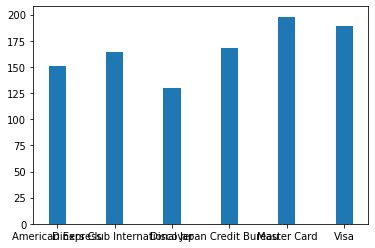

In [20]:
#plot
import matplotlib.pyplot as plt
fig, g = plt.subplots()
g.bar(client_data.index, client_data, 0.3)